<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Prarthee/CP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data


In [ ]:
!gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ -O data/

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/data/CP01.zip
100% 630M/630M [00:05<00:00, 117MB/s]


In [ ]:
!unzip data/CP01.zip -d data/

Archive:  data/CP01.zip
  inflating: data/For_modeling.csv   
  inflating: data/cleaned_seoul_bike_data.csv  


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/data/For_modeling.csv')
# df2 = pd.read_csv('/content/data/cleaned_seoul_bike_data.csv')
# df1.head()
# df2.head()

In [ ]:
df1.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
df2.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583860 entries, 0 to 8583859
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.6 GB


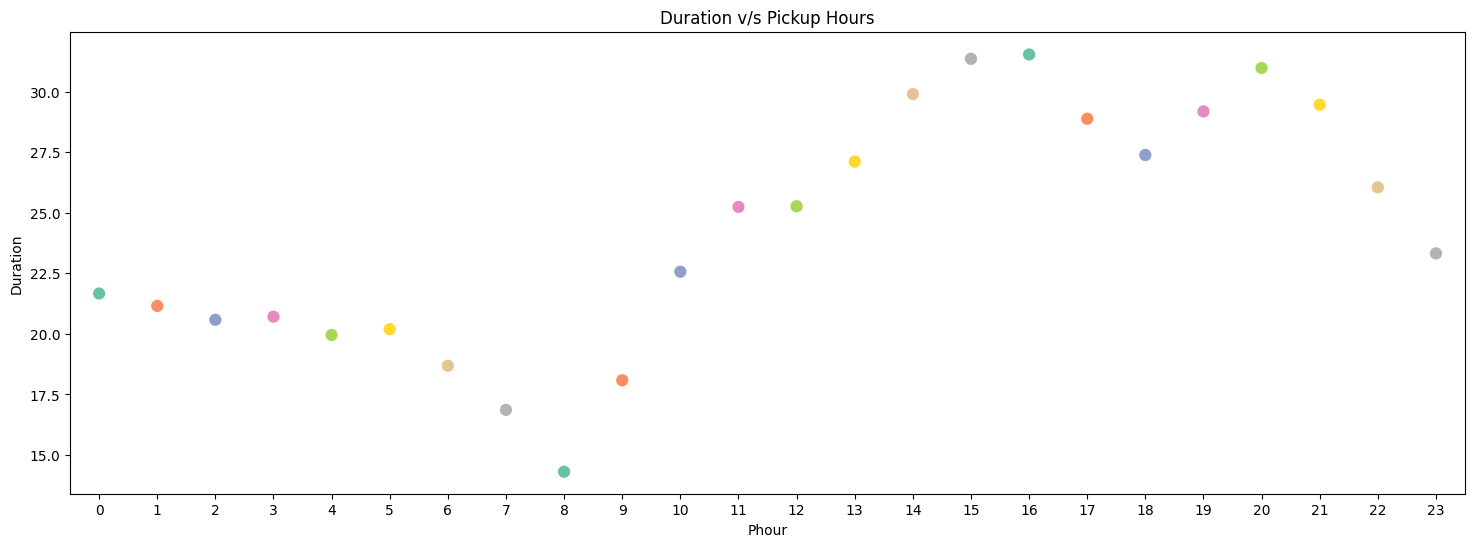

In [ ]:
plt.figure(figsize=(18,6))
sns.pointplot(x="Phour", y="Duration", data=df1, palette= sns.color_palette("Set2")).set(
    title="Duration v/s Pickup Hours");

From the above graph we infer that major travel happens between 8 am to 8 pm as the duration increases post 8 and decreases post 20.


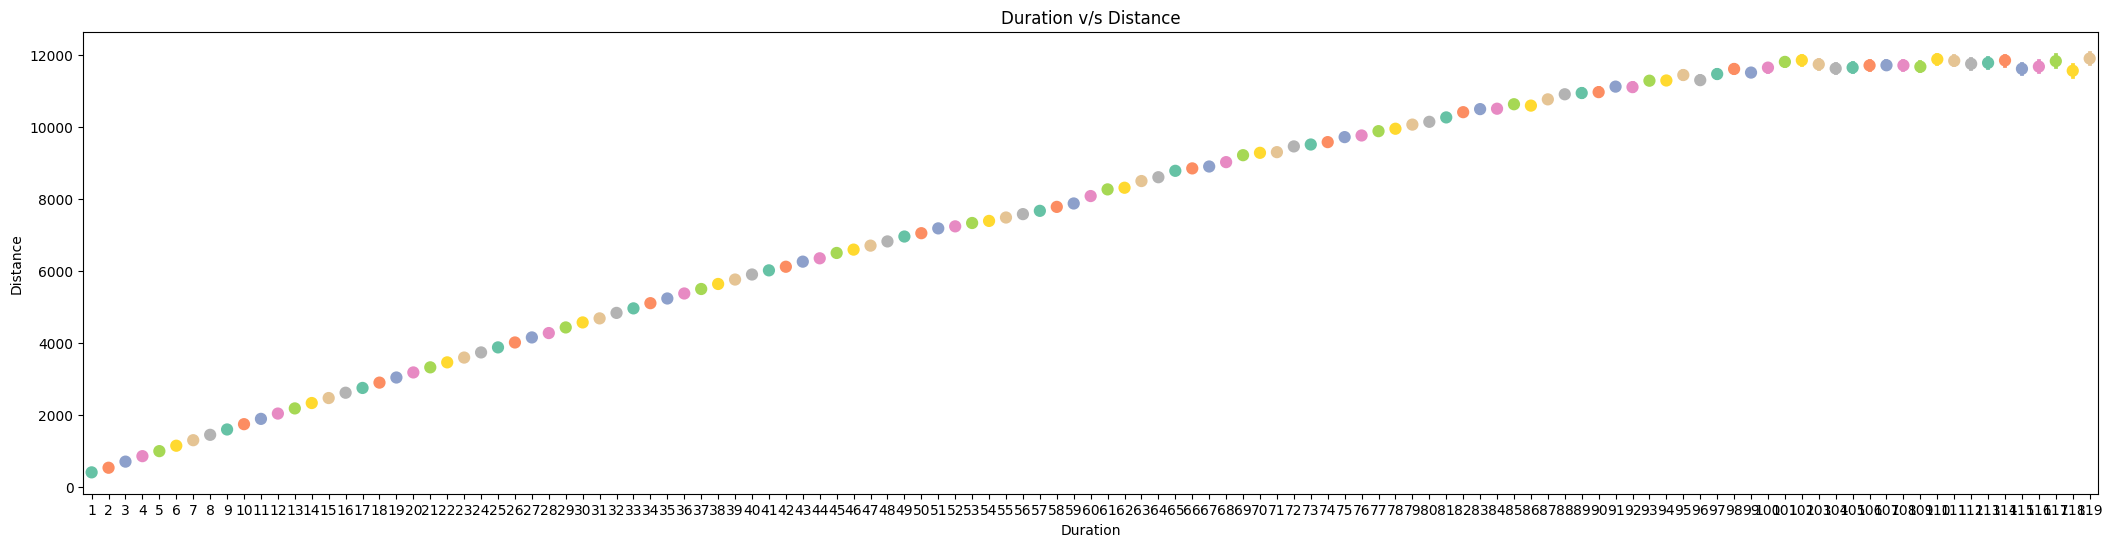

In [ ]:
plt.figure(figsize=(26,6))
sns.pointplot(x = "Duration", y = "Distance",data=df1, palette= sns.color_palette("Set2")).set(
    title="Duration v/s Distance");

The above graph infers that duration and distance are positively correlated.With increase in the duration the distance travelled also increases.

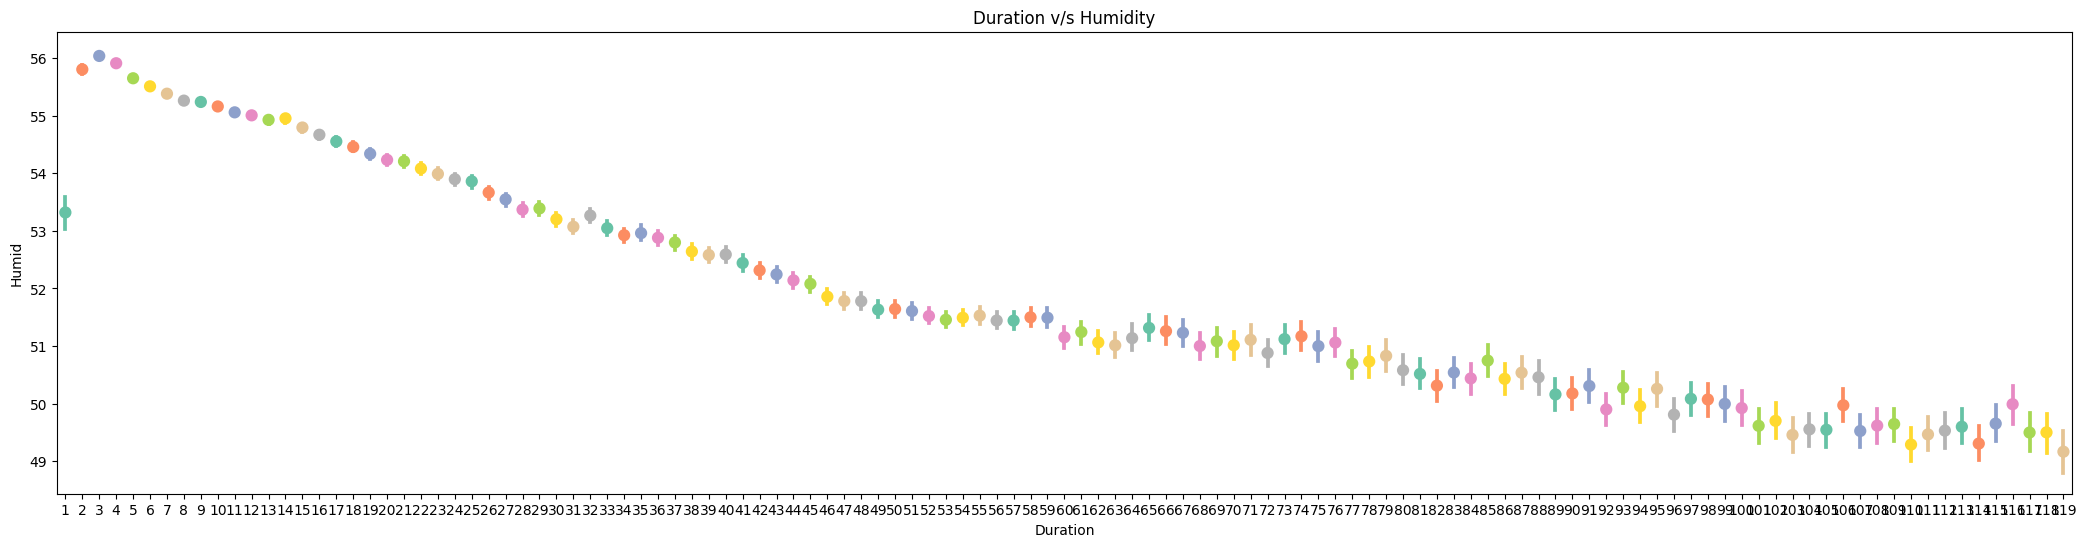

In [ ]:
plt.figure(figsize=(26,6))
sns.pointplot(x="Duration", y="Humid", data=df1, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Humidity");

From the above graph we infer that the humidity and the duration are negatively correlated. The duration decreases with increase in value of humidity in the atmosphere.

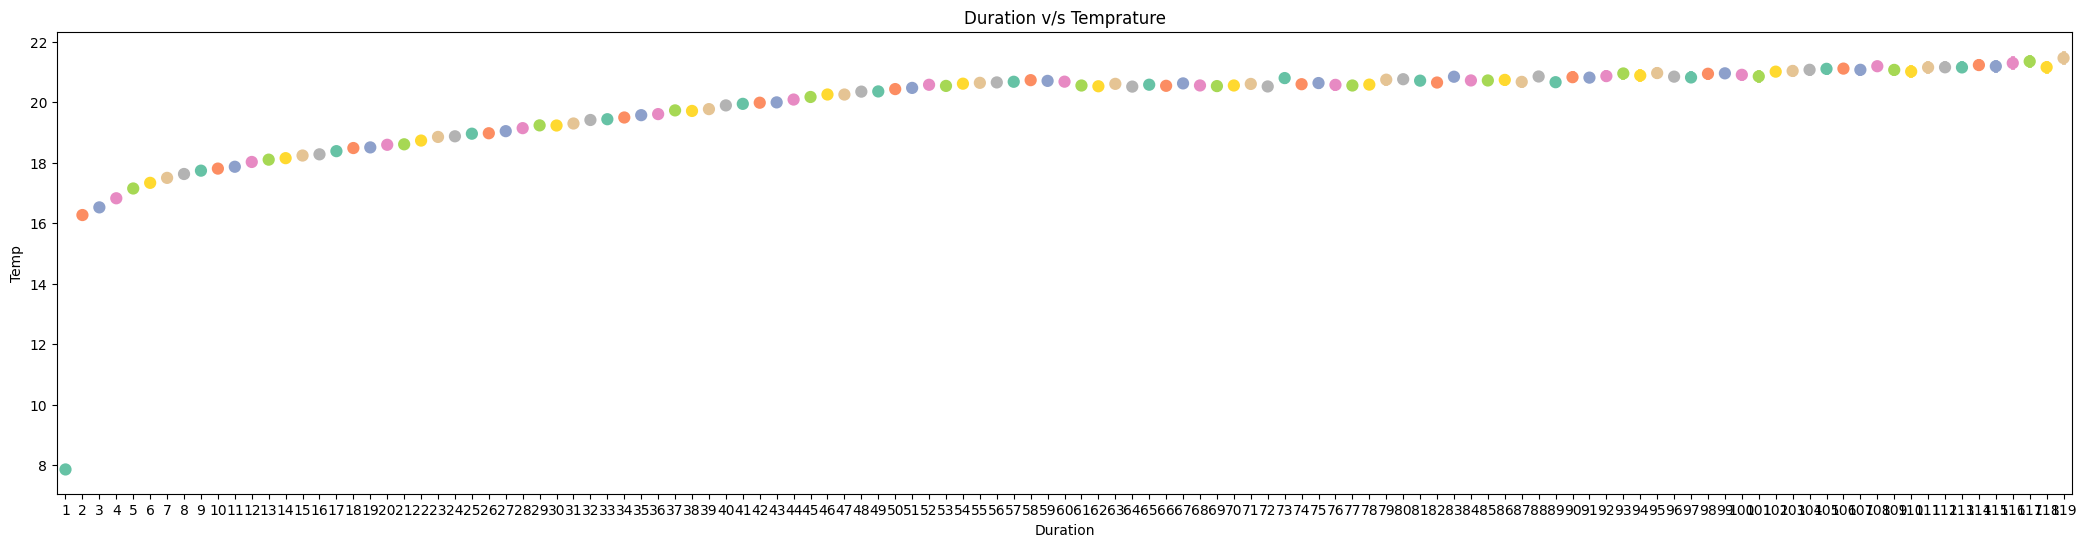

In [ ]:
plt.figure(figsize=(26,6))
sns.pointplot(x="Duration", y="Temp", data=df1, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Temprature");

From the above graph we infer that the temperature and the duration are positively correlated. The duration increases with increase in temperature.

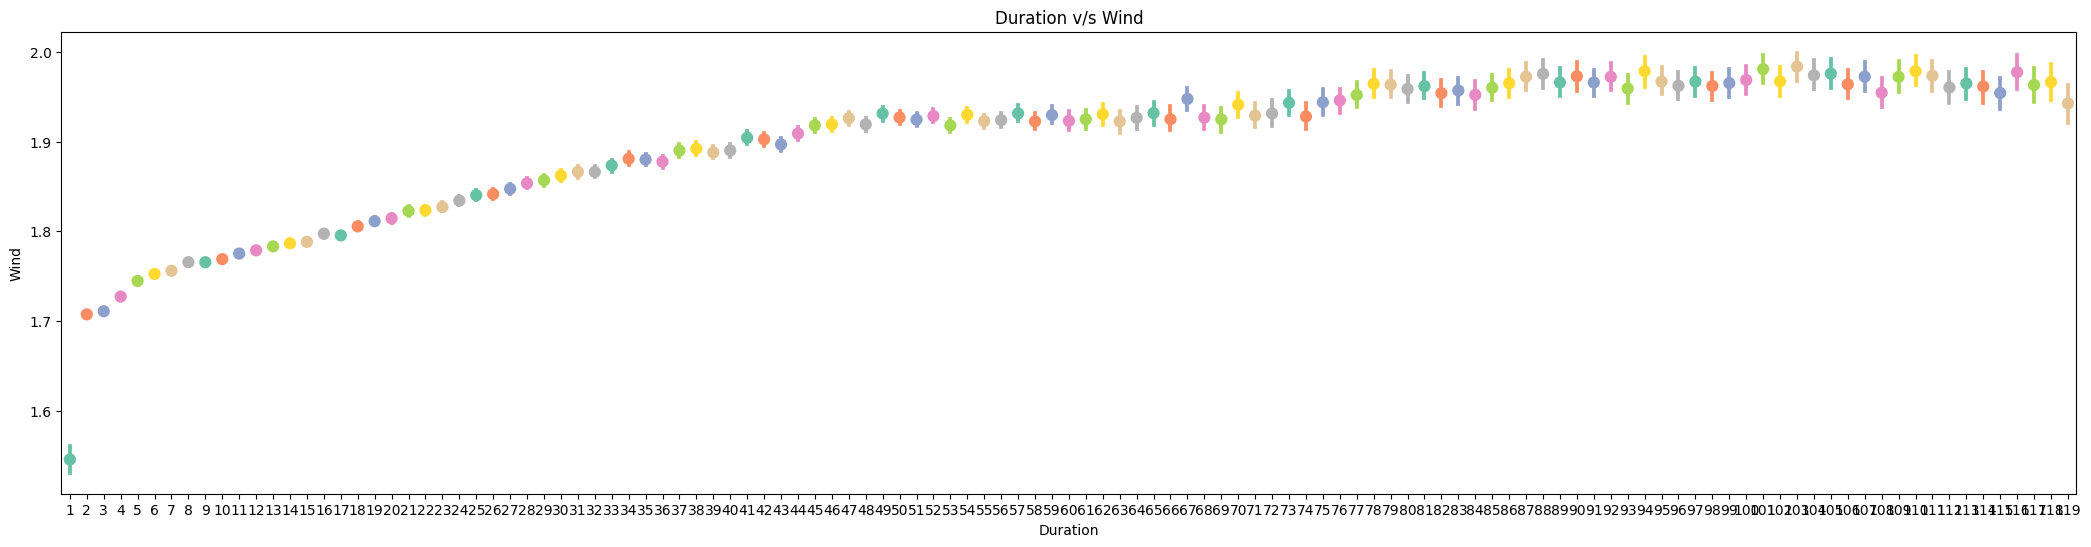

In [ ]:
plt.figure(figsize=(26,6))
sns.pointplot(x="Duration", y="Wind", data=df1, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Wind");

From the above graph we infer that the wind and the duration are positively correlated. The duration increases with increase in windy atmosphere.

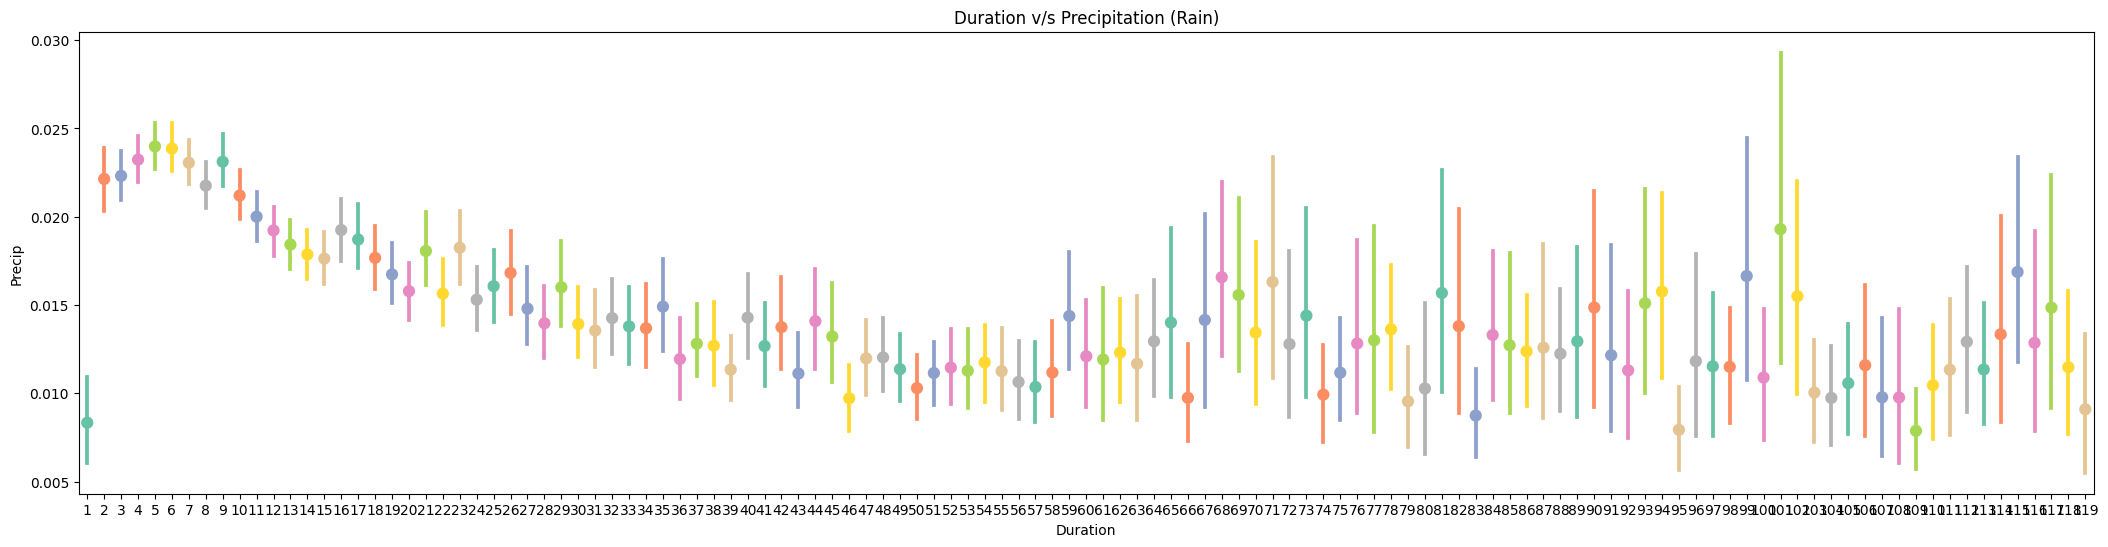

In [ ]:
plt.figure(figsize=(26,6))
sns.pointplot(x="Duration", y="Precip", data=df1, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Precipitation (Rain)");

The graph helps us infer that the Duration and Precipitation has positive correlation for most part of the data. Very few values are above 0.015.

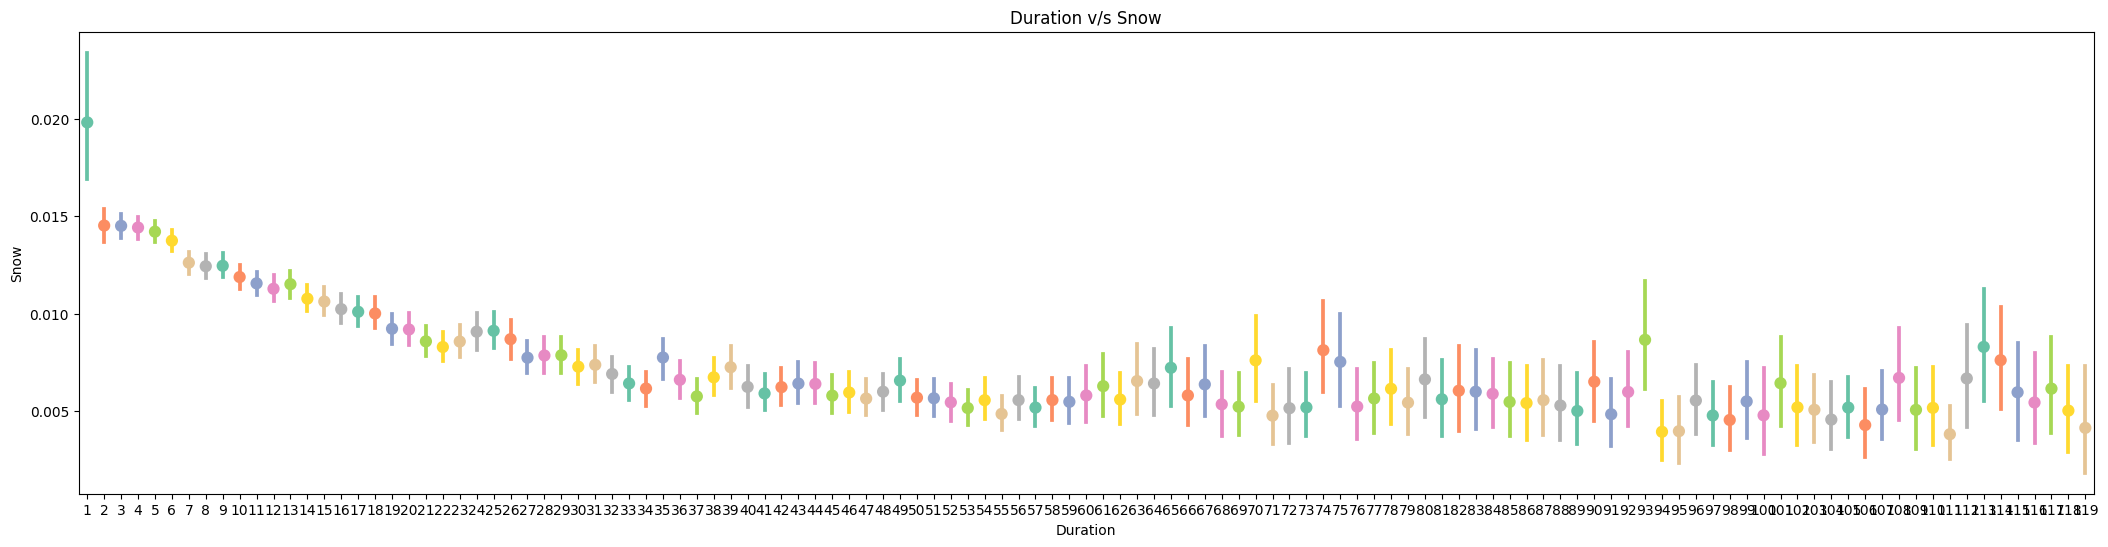

In [ ]:
plt.figure(figsize=(26,6))
sns.pointplot(x="Duration", y="Snow", data=df1, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Snow");

From the above graph we infer that the snow and the duration are negatively correlated. The duration decreases with increase in snowfall.

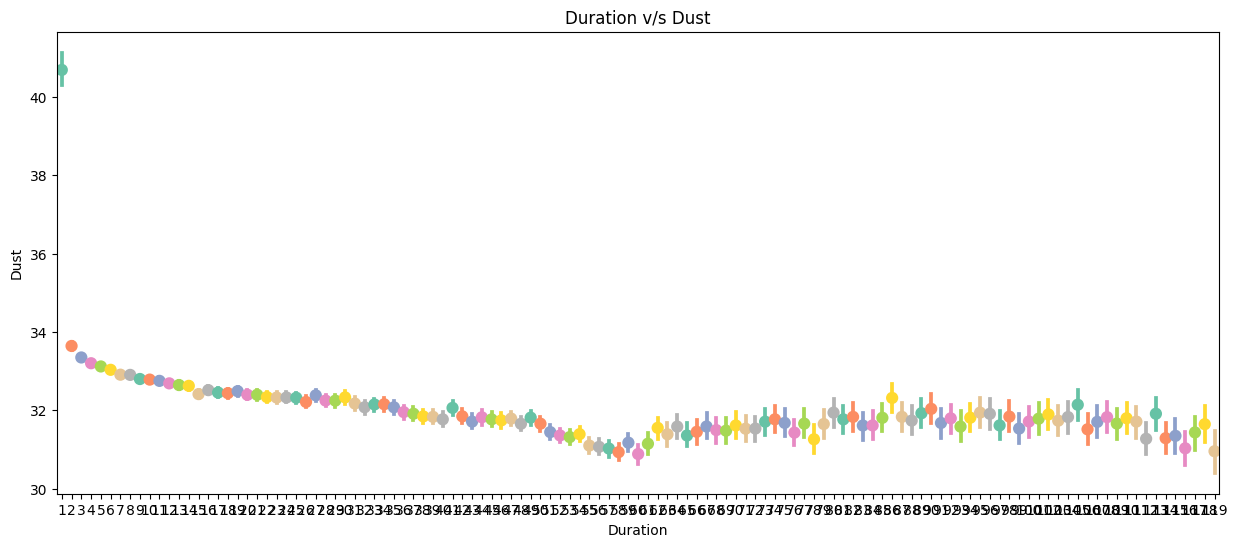

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="Duration", y="Dust", data=df1, palette=sns.color_palette("Set2")).set(
    title="Duration v/s Dust");

From the above graph we infer that the dust and the duration are correlated. (confirm inference)

From all the above graph we can say that duration is extremely affected by diffrent components of weather.

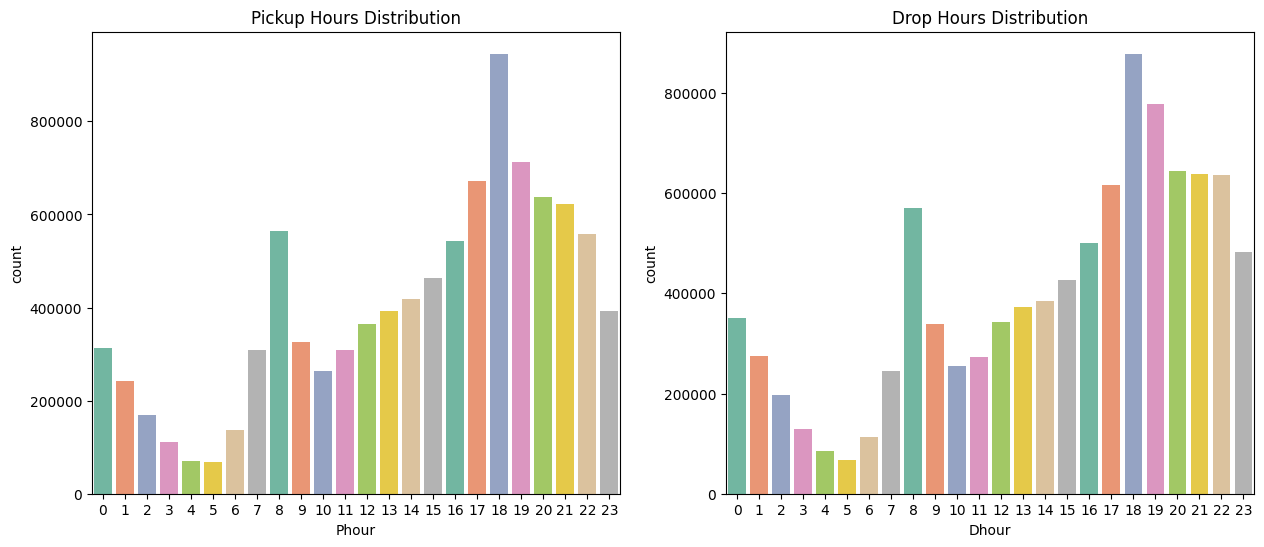

In [ ]:
figure, ax =plt.subplots(1,2, figsize = (15,6))
sns.countplot(data = df1, x ="Phour",ax=ax[0], palette = sns.color_palette("Set2")).set(
    title = "Pickup Hours Distribution");
sns.countplot(data = df1, x ="Dhour",ax = ax[1], palette = sns.color_palette("Set2")).set(
    title = "Drop Hours Distribution");
figure.show()

The graphs for Pickup and Drop Hours Distribution states that pickup and drop is maximum during office hours in morning as well as evening.

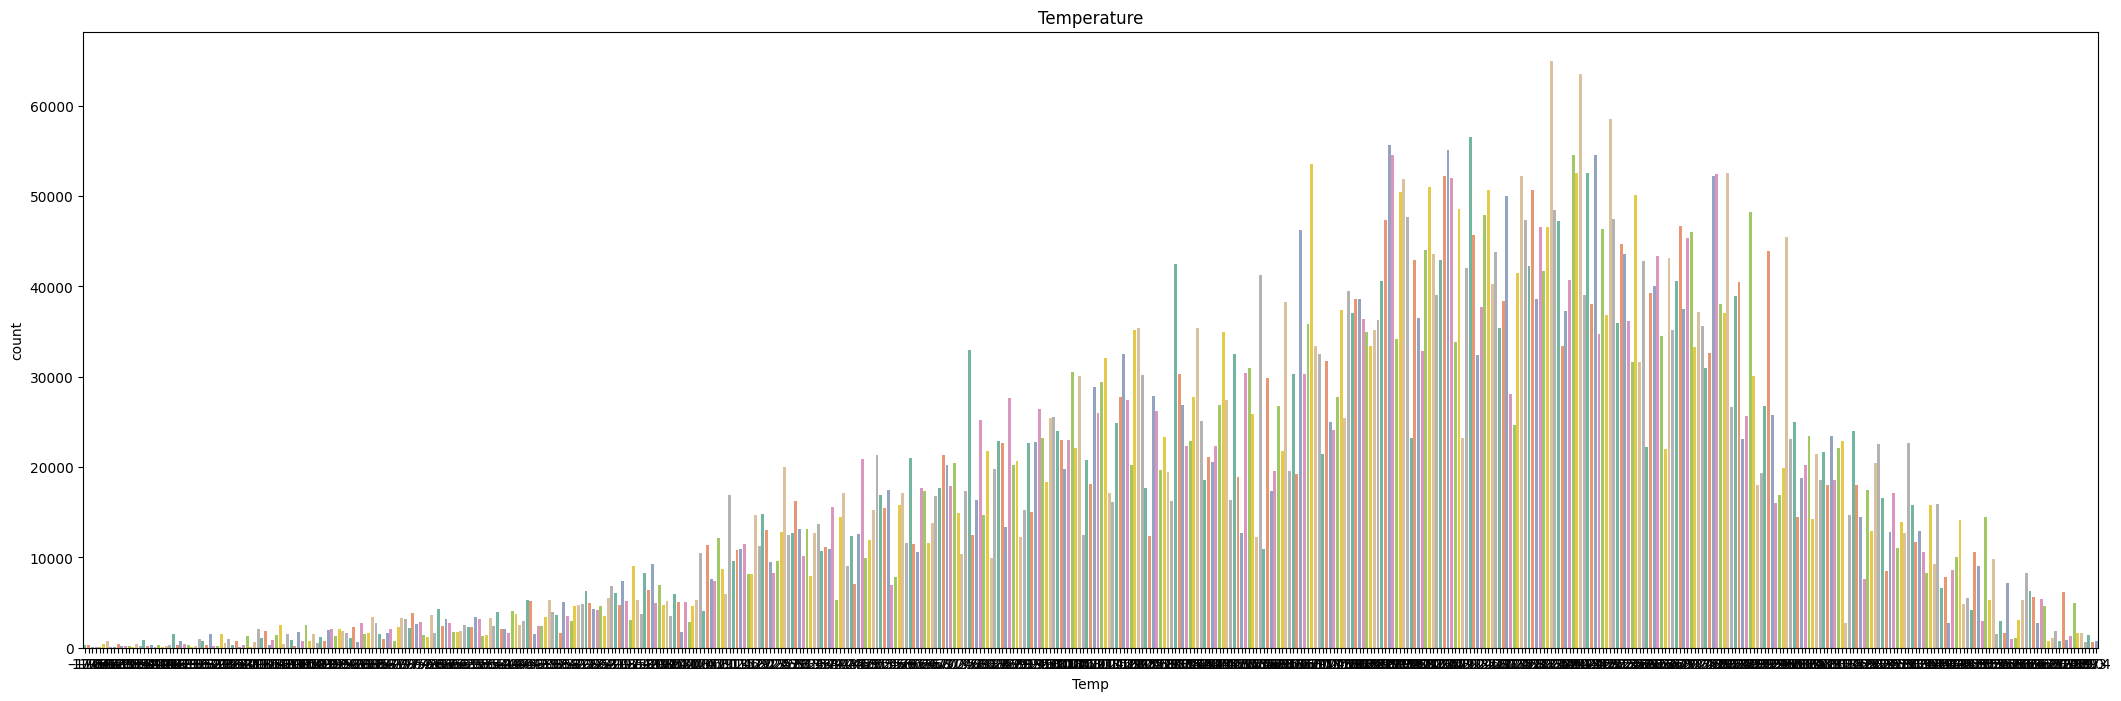

In [ ]:
plt.figure(figsize=(26,8))
sns.countplot(data = df1, x ="Temp", palette = sns.color_palette("Set2")).set(
    title = "Temperature");

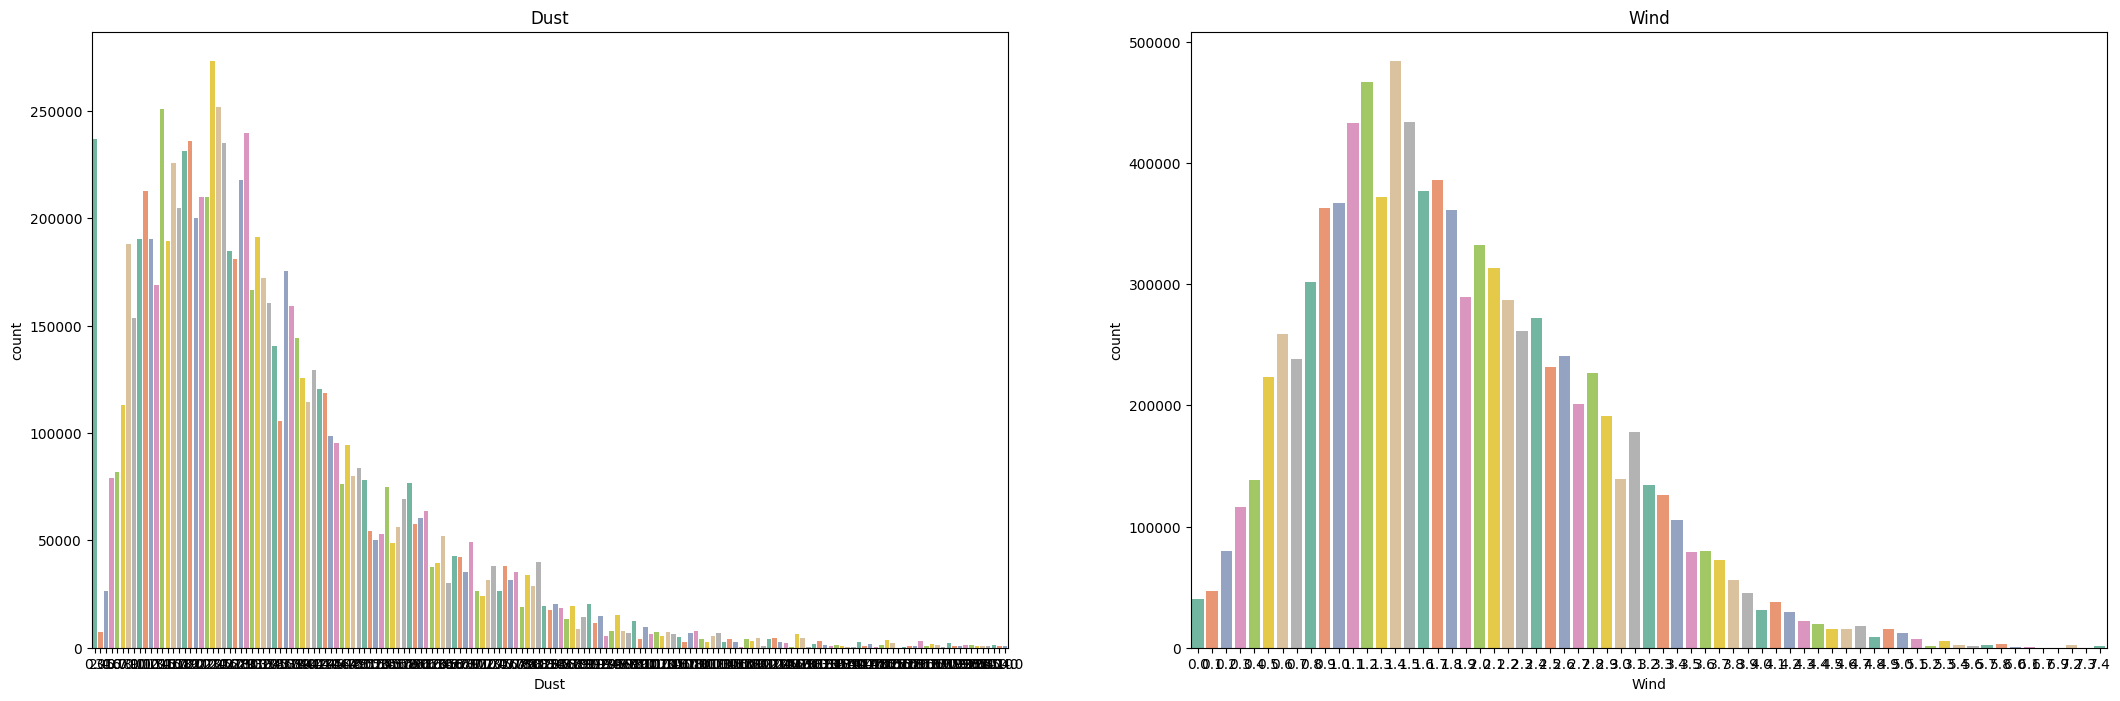

In [ ]:
figure, ax =plt.subplots(1,2, figsize = (26,8))
sns.countplot(data = df1, x ="Dust",ax=ax[0], palette = sns.color_palette("Set2")).set(
    title = "Dust");
sns.countplot(data = df1, x ="Wind",ax=ax[1], palette = sns.color_palette("Set2")).set(
    title = "Wind");
figure.show();

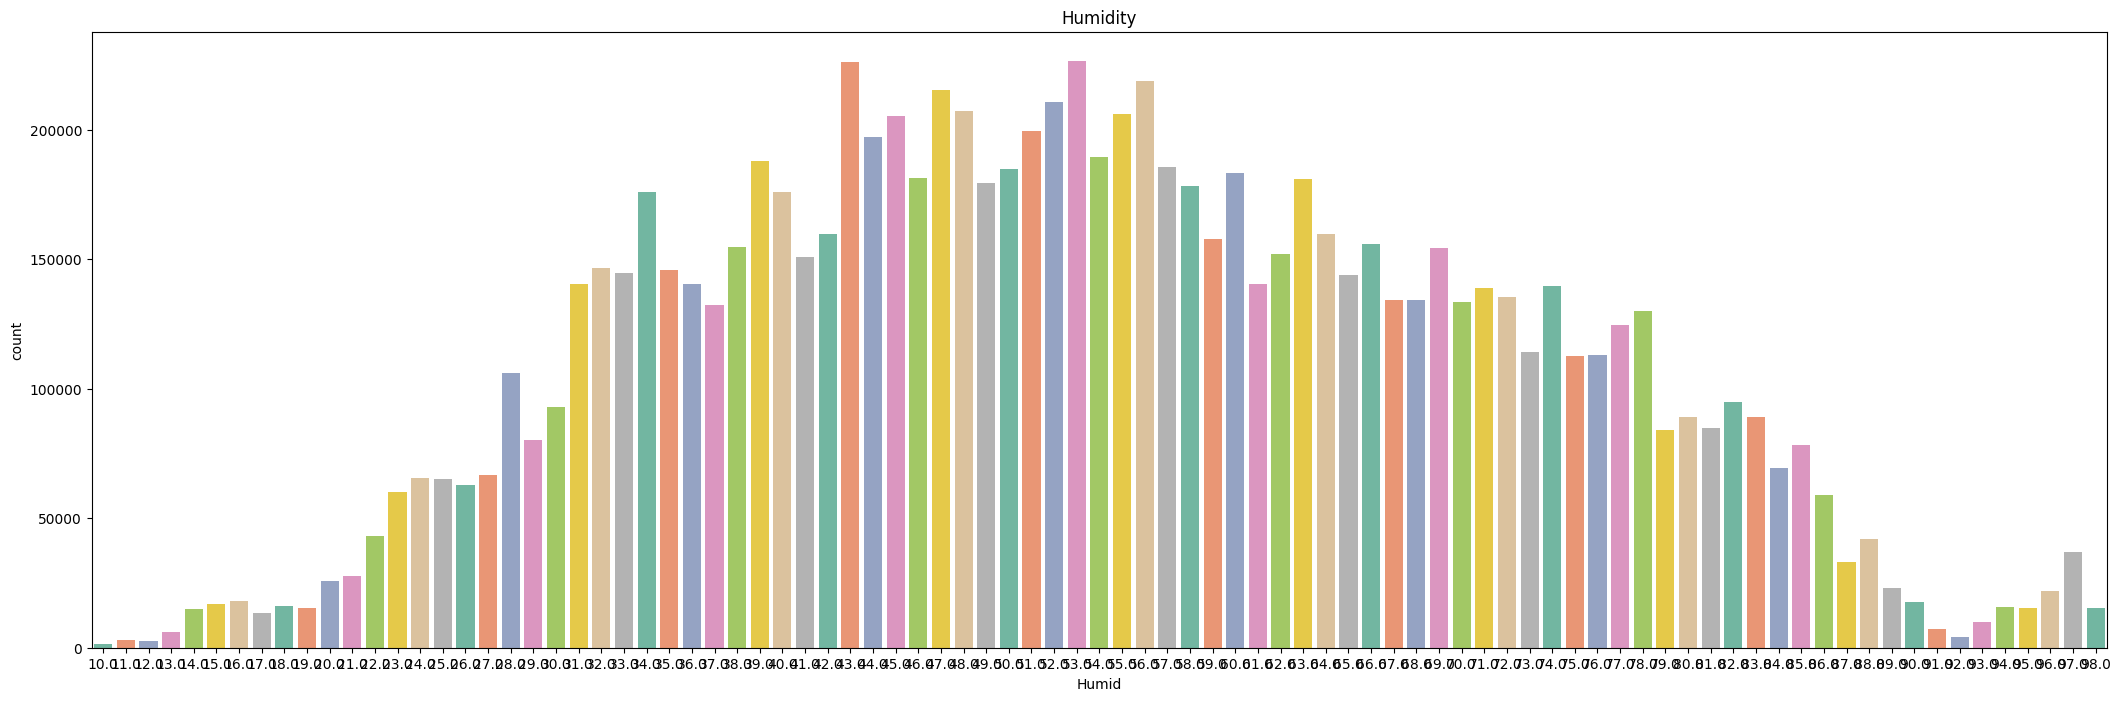

In [ ]:
plt.figure(figsize=(26,8))
sns.countplot(data = df1, x ="Humid", palette = sns.color_palette("Set2")).set(
    title = "Humidity");

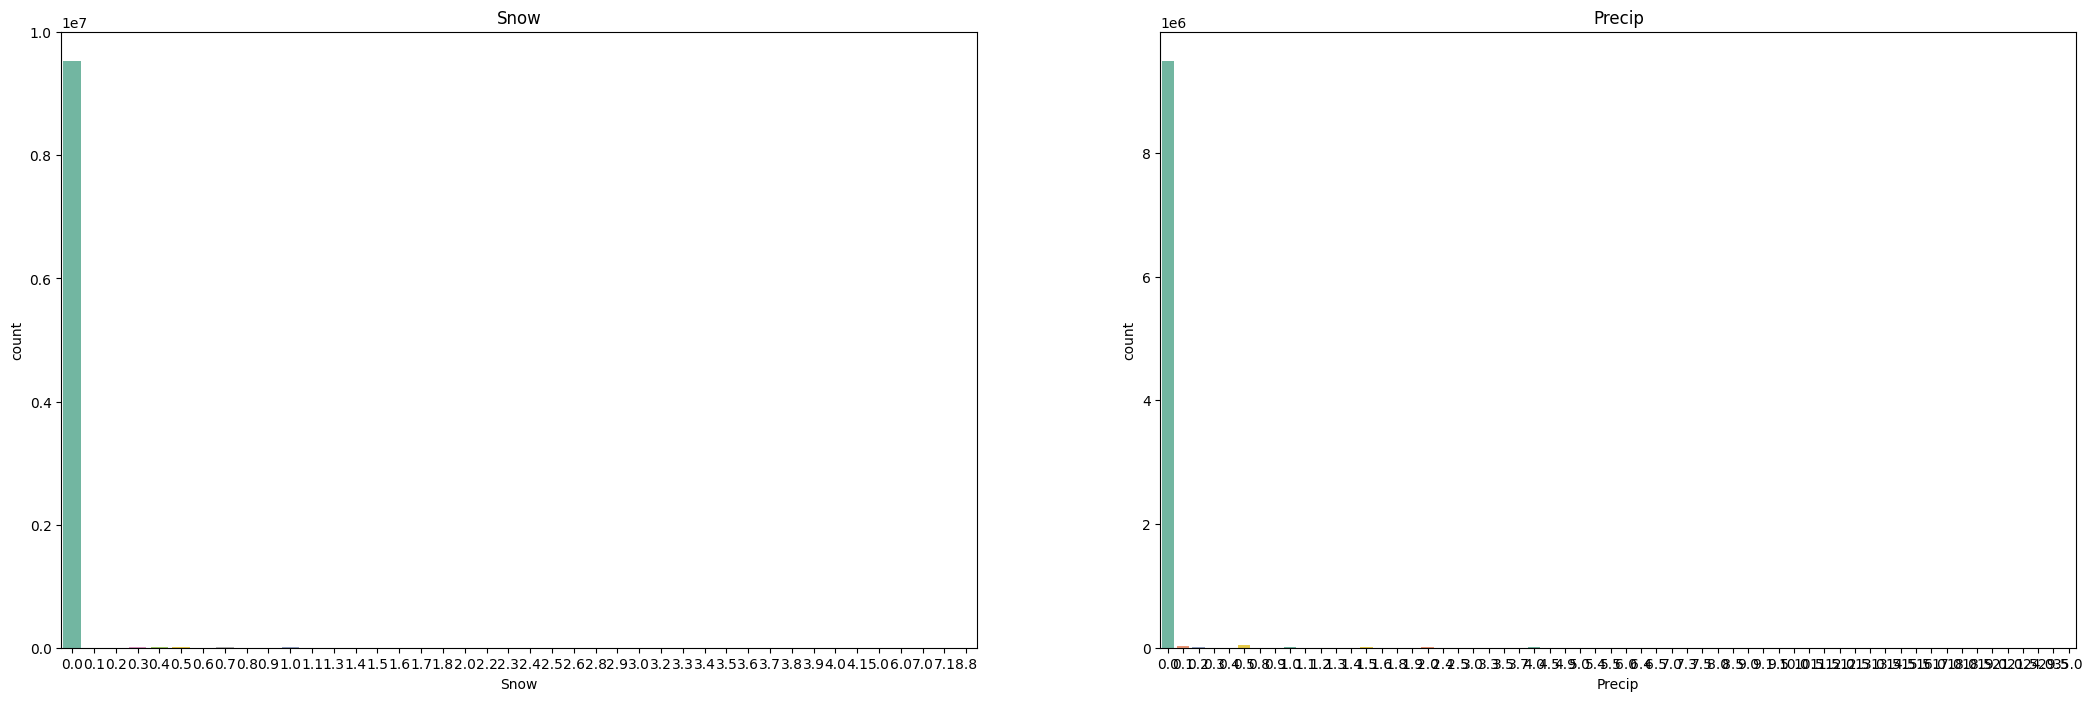

In [ ]:
figure, ax =plt.subplots(1,2, figsize = (26,8))
sns.countplot(data = df1, x ="Snow",ax=ax[0], palette = sns.color_palette("Set2")).set(
    title = "Snow");
sns.countplot(data = df1, x ="Precip",ax=ax[1], palette = sns.color_palette("Set2")).set(
    title = "Precip");
figure.show();

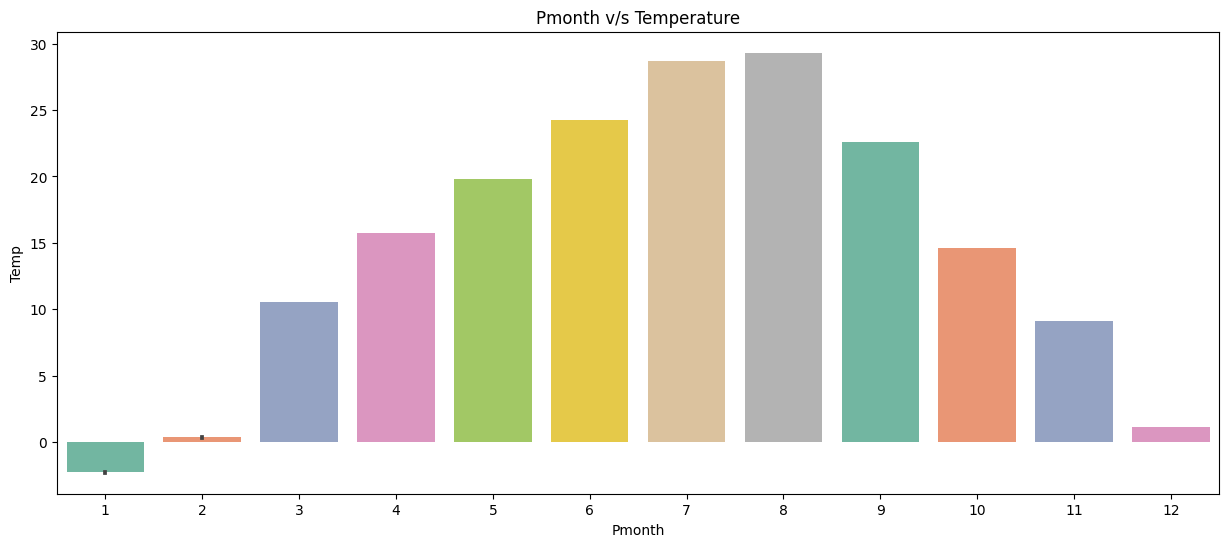

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Pmonth',
            y = 'Temp',
            data = df1,
           palette=sns.color_palette("Set2")).set(
    title="Pmonth v/s Temperature");

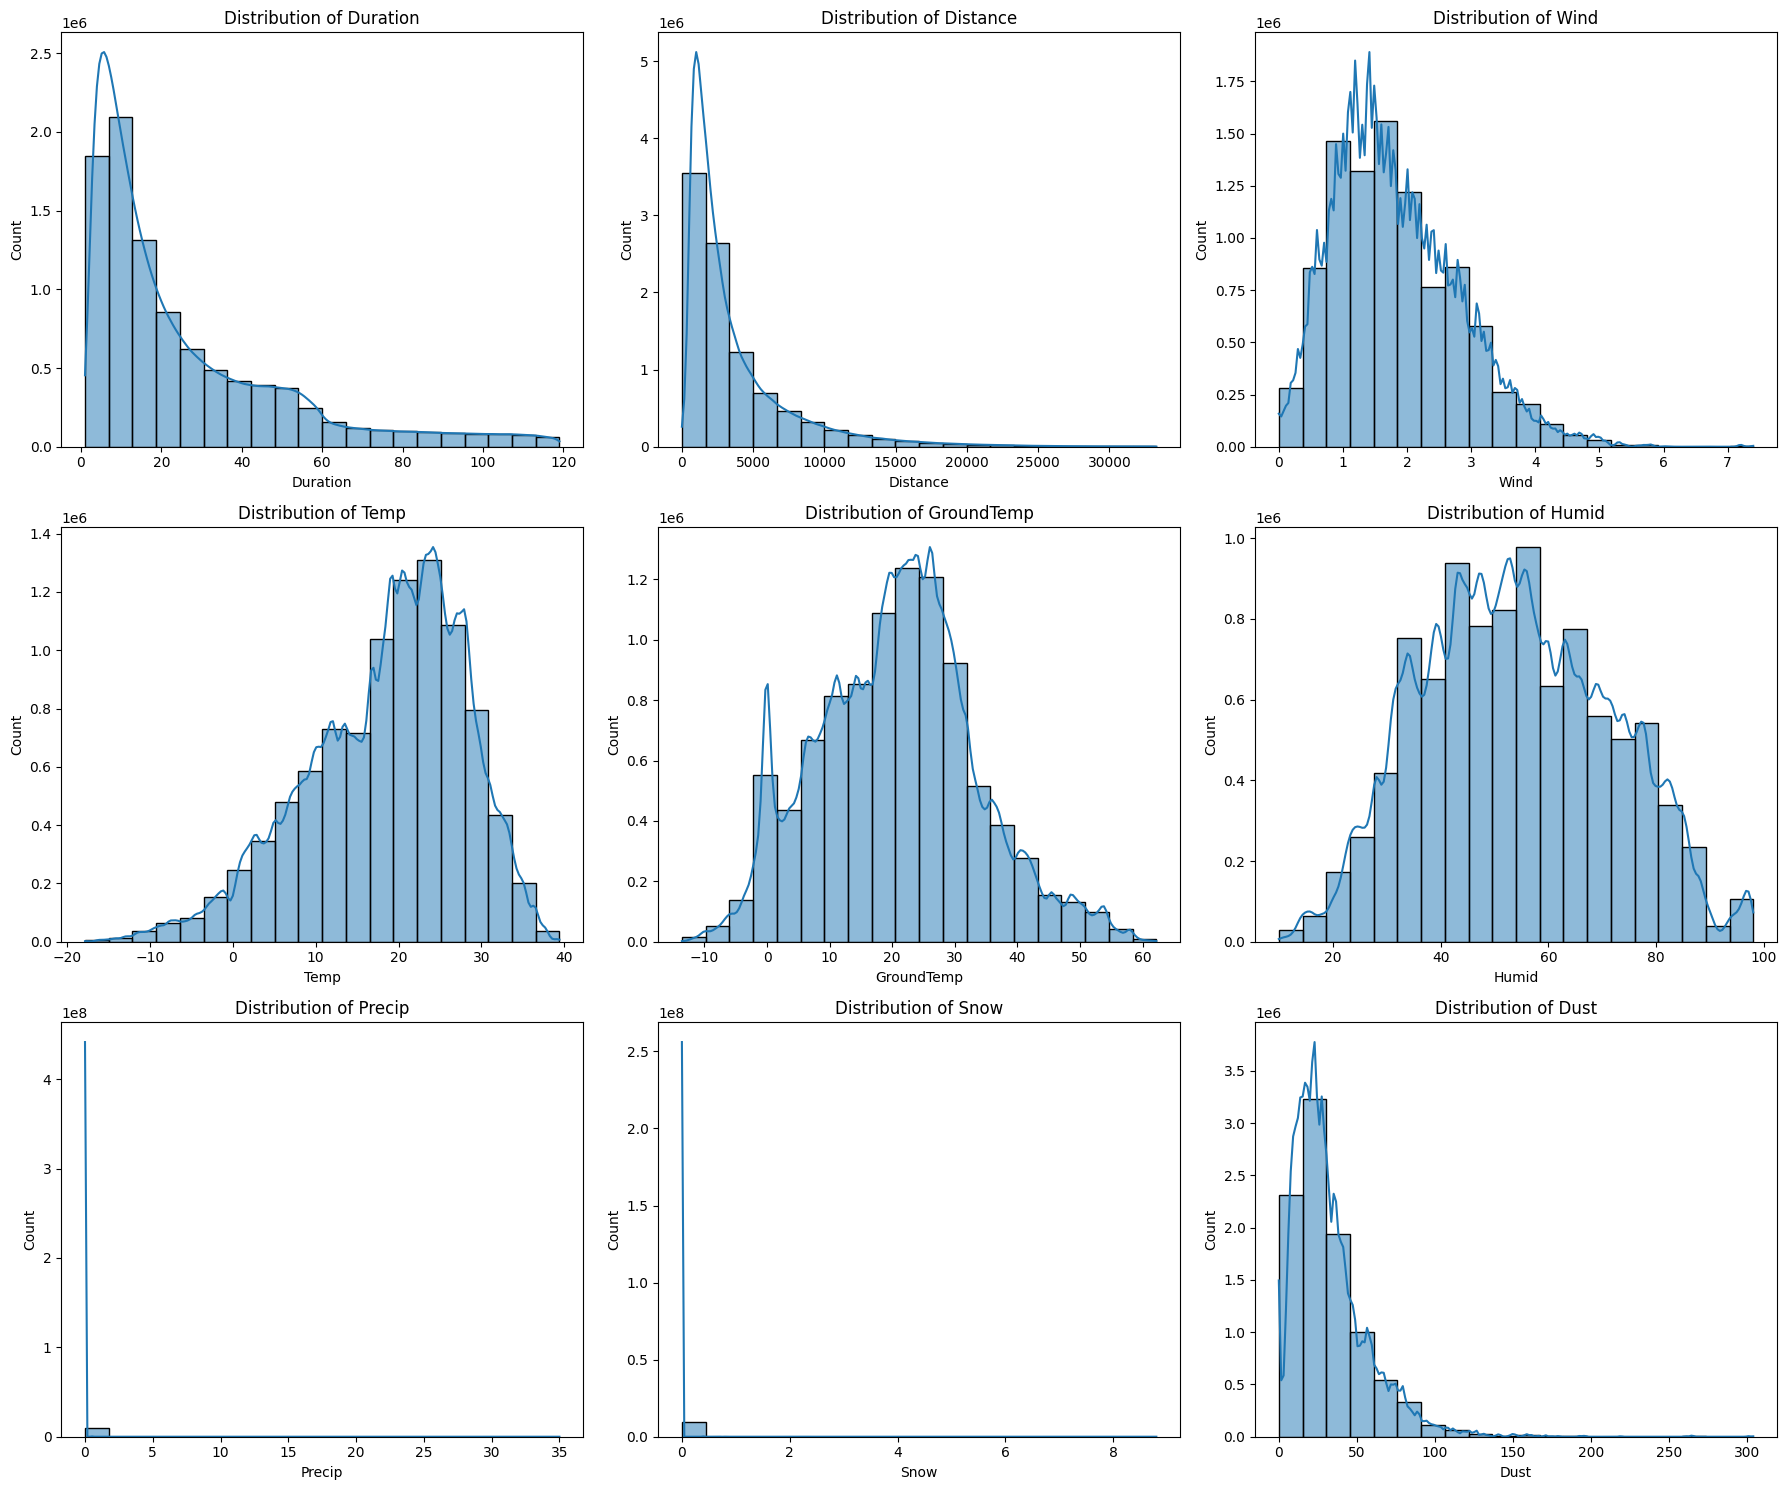

In [ ]:
col_names = ['Duration', 'Distance', 'Wind', 'Temp', 'GroundTemp', 'Humid', 'Precip', 'Snow', 'Dust']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.histplot(df1[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()